In [4]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
from typing import List
import numpy as np
import joblib
from mprompt.modules.fmri_module import SAVE_DIR_FMRI
import imodelsx.util
from mprompt.modules.emb_diff_module import EmbDiffModule
import scipy.stats
from mprompt.methods.m4_evaluate import D5_Validator
import torch.cuda
num_top_test_ngrams = 75
# r = (pd.read_pickle('../results/results_fmri.pkl')
    # .sort_values(by=['top_score_synthetic'], ascending=False))
r = (pd.read_pickle('../results/results_fmri_full.pkl')
    .sort_values(by=['top_score_synthetic'], ascending=False))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
columns = {
    # fmri stuff
    'subject': 'Subject',
    'module_num': 'Voxel',
    'roi_func': 'ROI (functional)',
    'roi_anat': 'ROI (anatomical)',
    'fmri_test_corr': 'Correlation (test)',
    
    # scores
    'top_score_synthetic': 'Synthetic data score',
    'frac_top_ngrams_module_correct': 'Fraction of matching ngrams (module, top-75)',
    # 'rankcorr_expl_test': 'Correlation (test) when predicting with only explanation',
    # 'frac_top_ngrams_test_correct': 'Fraction of matching ngrams (test, top-75)',
            
    # explanation
    'top_explanation_init_strs': 'Explanation',
        
    # ngrams matching the explanation (used 75 ngrams)
    'top_ngrams_module_correct': 'Matching top ngrams (out of top-75)',
    # 'top_ngrams_test_correct': 'Matching ngrams (test, top-75)',

    # all ngrams
    'top_ngrams_module_25': 'All top ngrams (top-25)',
    # 'top_ngrams_test_25': 'Top ngrams (test, top-25)',

    # alternative explanations
    'explanation_init_strs': 'Explanation candidates',
}

tab = (
    r
    .sort_values(by=['top_score_synthetic'], ascending=False)
    # .sort_values(by=['rankcorr_expl_test'], ascending=False)
    .filter(columns.keys())
    .rename(columns=columns)
    .round(3)
)
with pd.option_context('display.max_colwidth', -1, 'display.max_rows', 200):
    display(
        tab.head(3)
    )
    tab_join_lists = tab.applymap(lambda x: ' __ '.join(x) if isinstance(x, np.ndarray) or isinstance(x, list) else x)
    tab_join_lists.to_csv('../results/results_fmri.csv', index=False, float_format='%.3f')

In [9]:
dsets = joblib.load(join(SAVE_DIR_FMRI, 'stories', 'running_words.jbl'))

for i in tqdm(range(1)):
    row = r.iloc[i]
    resp = dsets[row['subject']]['resp'][:, row['module_num']]
    neg_dists = row['neg_dists_expl_test']

100%|██████████| 1/1 [00:00<00:00, 1412.70it/s]


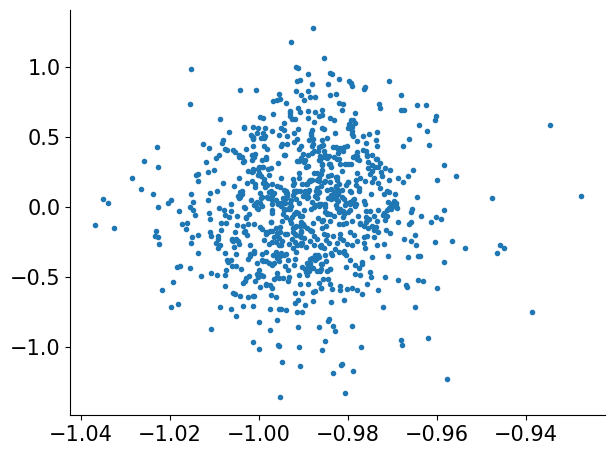

In [14]:
np.

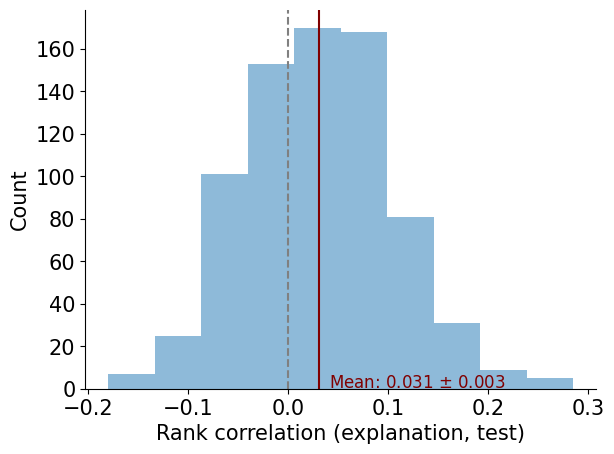

In [5]:
plt.hist(r['rankcorr_expl_test'], alpha=0.5) #, bins=20)
plt.axvline(0, color='gray', linestyle='dashed')
plt.ylabel('Count')

# draw vertical line at mean and add text label
plt.axvline(r['rankcorr_expl_test'].mean(), color='maroon')
mean_and_std_err_string = f"Mean: {r['rankcorr_expl_test'].mean():.3f} $\pm$ {r['rankcorr_expl_test'].std() / np.sqrt(r['rankcorr_expl_test'].size):.3f}"
plt.text(r['rankcorr_expl_test'].mean() + 0.01, 0.5, mean_and_std_err_string, rotation=0, fontsize=12, color='maroon')
plt.xlabel('Rank correlation (explanation, test)')
plt.show()

# with pd.option_context('display.max_colwidth', -1, 'display.max_rows', 200):
#     display(
#         r.sort_values(by=['rankcorr_expl_test'], ascending=False)[['top_explanation_init_strs', 'rankcorr_expl_test', 'roi_func', 'fmri_test_corr', 'subject']].head(20)
#     )

### Visualize how things relate to each other

In [ ]:
scores = ['fmri_test_corr', 'top_score_synthetic', 'frac_top_ngrams_module_correct', 'rankcorr_expl_test']
sns.pairplot(
    r[scores], kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}}, markers='.',
    height=3, aspect=2,
    corner=True
    )
plt.show()